In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('/fs/cbsuvlaminck2/workdir/bmg224/hiprfish/image_analysis_code')
from segmentation import Segmentation
import image_functions as imfn
from tqdm import tqdm

In [3]:
data_dir = '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_04_05_dnafishmethodchar'
factors = ['method', 'plasmid', 'fov']
sample_names = imfn.get_sample_names(data_dir=data_dir)
print(len(sample_names))
refl = ['gfp', 'cy5']

50


In [4]:
keys = [imfn.get_filename_keys(sn, filename_factors=factors) for sn in sample_names]
key_labels = [", ".join(k) for k in keys]
print(len(keys))

50


In [5]:
sn_dict = imfn.get_nested_dict(keys, sample_names, [0,1])
I = ['a','b','c','d','e','f','g']
J = ['neg','pos']
sn_sort = []
key_labels = []
for i in I:
    for j in J:
        for key, sn in sn_dict[i][j]:
            sn_sort.append(sn)
            key_labels.append(', '.join(key))

In [14]:
flat_field_filename = '/fs/cbsuvlaminck2/workdir/bmg224/data/2021/devlaminck_widefield/2021_04_12_flat_field_correction_lens_100x_refl_cy5.czi'
flat_field_index = 0

In [18]:
sn = sn_sort[41]
print(sn)

2021_04_05_dnafishmethodchar_method_g_plasmid_pos_fov_3


In [10]:
from image import Image


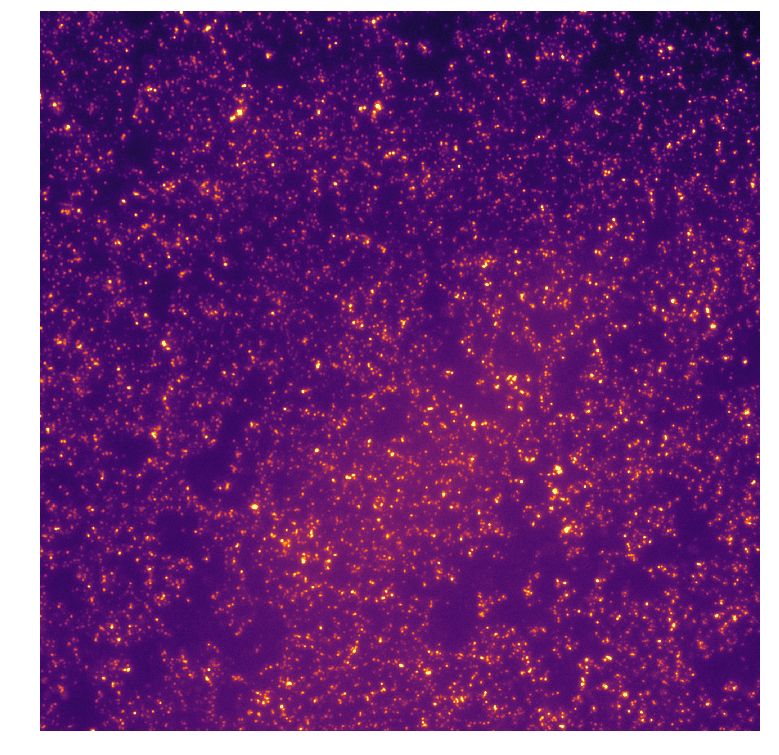

In [19]:
im = Image(sample_name=sn, data_dir=data_dir, illumination_names=refl, 
             flat_field_filename=flat_field_filename, 
             flat_field_index=flat_field_index)
spot_channels=['cy5']
cmap='inferno'
clims=(0.1, 0.4)
save=False
dims=(10,10)
im.pick_channel(illumination=spot_channels)
im.save_intensity_image(image=im.raw_2D, 
                        fname_mod='_spot_raw', 
                        clims=clims, cmap=cmap, dims=dims,
                        save=save)

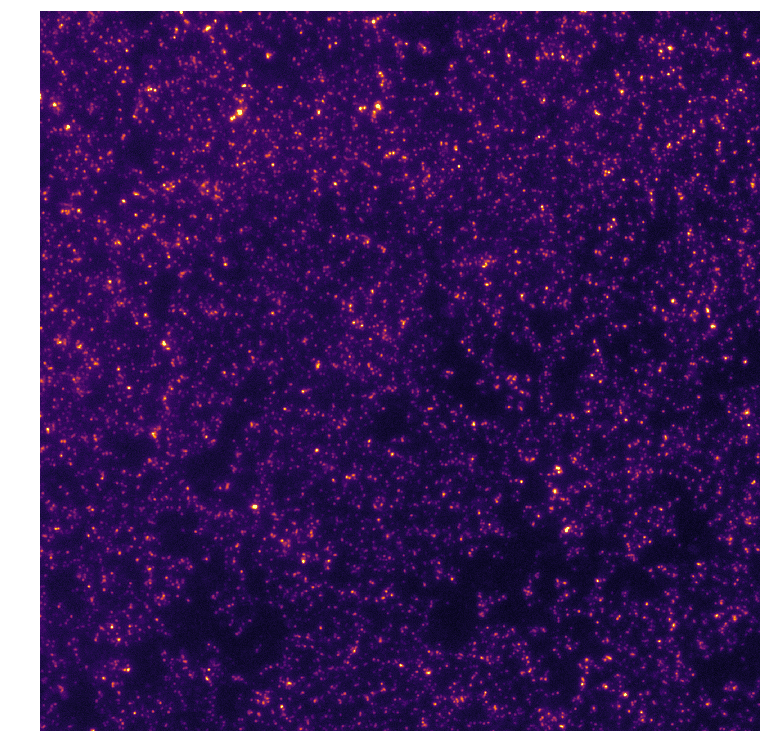

In [20]:
im.flat_field_correction()
im.save_intensity_image(image=im.raw_2D, 
                        fname_mod='_spot_raw', 
                        clims=clims, cmap=cmap, dims=dims,
                        save=save)